# Load the Data:

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("UniversalBank.csv")

## Data Preprocessing:

In [2]:
from sklearn.model_selection import train_test_split

# Drop unnecessary columns
data = data.drop(['ID', 'ZIP Code'], axis=1)

# Create dummy variables for categorical predictors
data = pd.get_dummies(data, columns=['Education'])

# Define predictors and target variable
X = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']

# Partition the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=42)

## K-NN Classification:

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Fit k-NN model
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

# Customer data
customer_data = [[40, 10, 84, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1]]

# Predict
prediction = knn_model.predict(customer_data)
print("Prediction:", prediction)

Prediction: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [5]:
from sklearn.model_selection import cross_val_score

# Define a list of possible k values
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

# Calculate cross-validation scores for each k value
cv_scores = []
for k in k_values:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
  cv_scores.append(scores.mean())

# Find the k value with the highest cross-validation score
best_k = k_values[cv_scores.index(max(cv_scores))]
print(best_k)

# Train the model with the best k value
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

# Predict using the best k value
prediction = knn_model.predict(customer_data)
print("Prediction:", prediction)

5
Prediction: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Confusion Matrix:

## Use the best k to predict on the validation set and calculate the confusion matrix.

In [6]:
# Fit model with best k
knn_model_best = KNeighborsClassifier(n_neighbors=best_k)
knn_model_best.fit(X_train, y_train)

# Predict on validation set
y_pred_valid = knn_model_best.predict(X_valid)

# Confusion matrix
conf_matrix_valid = confusion_matrix(y_valid, y_pred_valid)
print("Confusion Matrix (Validation):")
print(conf_matrix_valid)

Confusion Matrix (Validation):
[[1742   57]
 [ 135   66]]


In [7]:
# Repartition the data
X_train_new, X_test, y_train_new, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid_new, y_train, y_valid_new = train_test_split(X_train_new, y_train_new, test_size=0.375, random_state=42)

# Train the model with the best k
knn_model_best.fit(X_train, y_train)

# Predict on validation and test sets
y_pred_valid_new = knn_model_best.predict(X_valid_new)
y_pred_test = knn_model_best.predict(X_test)

# Calculate confusion matrices
conf_matrix_train = confusion_matrix(y_train, knn_model_best.predict(X_train))
conf_matrix_valid_new = confusion_matrix(y_valid_new, y_pred_valid_new)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print confusion matrices
print("Confusion Matrix (Training):")
print(conf_matrix_train)
print("Confusion Matrix (Validation):")
print(conf_matrix_valid_new)
print("Confusion Matrix (Test):")
print(conf_matrix_test)


Confusion Matrix (Training):
[[2236   42]
 [ 119  103]]
Confusion Matrix (Validation):
[[1318   29]
 [ 112   41]]
Confusion Matrix (Test):
[[873  22]
 [ 78  27]]


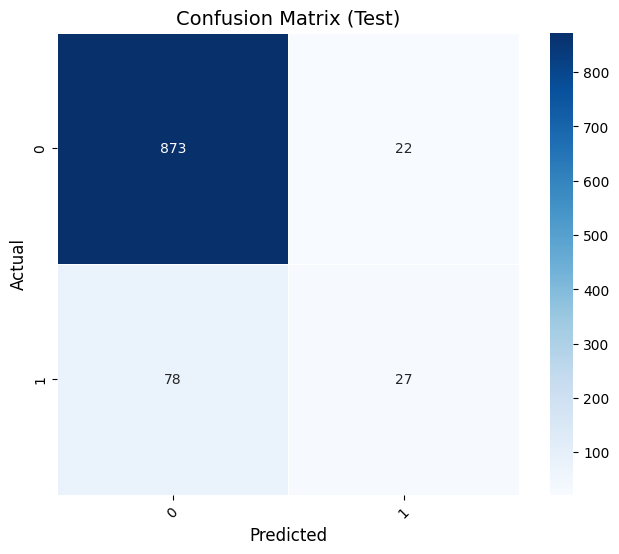

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
cm = conf_matrix_test

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap="Blues")

# Set labels and title
ax.set_xlabel("Predicted", fontsize=12)
ax.set_ylabel("Actual", fontsize=12)
ax.set_title("Confusion Matrix (Test)", fontsize=14)

# Rotate x-axis labels
ax.tick_params(axis="x", rotation=45)

# Show the plot
plt.show()
